In [35]:
%%writefile ../Sandbox/sir.ode
par beta=2
par alpha=0.01
par gamma=0.01
par sigma=5
par mu=0.01
par f=0.1
s'=mu-beta*s*i-mu*s+f*r
e'=beta*s*i-sigma*e-mu*e
i'=sigma*e-alpha*i-gamma*i-mu*i
r'=gamma*i-mu*r-f*r
init s=0.99 e=0.01 i=0.0 r=0.0
@ total=250
@ output=sir_xpp.out
done

Overwriting ../Sandbox/sir.ode


template from https://github.com/epirecipes/epicookbook/tree/56ce40238692724f2ce4d37fbb068195462fcda3

In [28]:
!xppaut ../Sandbox/sir.ode -silent

Parameters:
|beta|=2.000000 
Parameters:
|alpha|=0.100000 
Parameters:
|gamma|=0.100000 
Parameters:
|sigma|=5.000000 
Parameters:
|mu|=1.000000 
Parameters:
|f|=0.100000 
0:dS/dt=MU-BETA*S*I-MU*S+F*R  
1:dE/dt=BETA*S*I-SIGMA*E-MU*E  
2:dI/dt=SIGMA*E-ALPHA*I-GAMMA*I-MU*I  
3:dR/dt=GAMMA*I-MU*R-F*R  
 Initial S(0)=0.99
 Initial E(0)=0.01
 Initial I(0)=0
 Initial R(0)=0
 All formulas are valid!!
 nvar=4 naux=0 nfix=0 nmark=0 NEQ=4 NODE=4 
I' is a duplicate name
Used 12 constants and 116 symbols 
XPPAUT 6.11 Copyright (C) 2002-2011  Bard Ermentrout 
 Storage full -- increase maxstor 
 Run complete ... 


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
sir_out = pd.read_csv("sir_xpp.out",sep=" ",header=None,names=["t","S","E","I","R"],index_col=False)

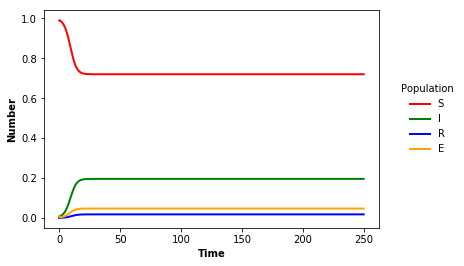

In [31]:
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
eline = plt.plot("t","E","",data=sir_out,color="orange",linewidth=2)

plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)